In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sea 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataTrain=pd.read_csv('wineQualityRed_train.csv', sep=';')
dataTest=pd.read_csv('wineQualityRed_test.csv', sep=';')

In [3]:
print(dataTrain.shape)
print(dataTest.shape)

(1119, 12)
(480, 12)


In [4]:
dataTrain.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              10.6             0.280         0.39           15.50      0.069   
1               9.4             0.300         0.56            2.80      0.080   
2              10.6             0.360         0.59            2.20      0.152   
3              10.6             0.360         0.60            2.20      0.152   
4              10.6             0.440         0.68            4.10      0.114   
5              10.2             0.670         0.39            1.90      0.054   
6              10.2             0.670         0.39            1.90      0.054   
7              10.2             0.645         0.36            1.80      0.053   
8              11.6             0.320         0.55            2.80      0.081   
9               9.3             0.390         0.40            2.60      0.073   
10              9.3             0.775         0.27            2.80      0.0

In [5]:
dataTest.describe

<bound method NDFrame.describe of      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4             0.700         0.00            1.90      0.076   
1              7.8             0.880         0.00            2.60      0.098   
2              7.8             0.760         0.04            2.30      0.092   
3             11.2             0.280         0.56            1.90      0.075   
4              7.4             0.700         0.00            1.90      0.076   
5              7.4             0.660         0.00            1.80      0.075   
6              7.9             0.600         0.06            1.60      0.069   
7              7.3             0.650         0.00            1.20      0.065   
8              7.8             0.580         0.02            2.00      0.073   
9              7.5             0.500         0.36            6.10      0.071   
10             6.7             0.580         0.08            1.80      0.097   
11    

In [6]:
dataTrain.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
dataTest.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
X_train=dataTrain[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y_train=dataTrain['quality']
X_test=dataTest[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y_test=dataTest['quality']

In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


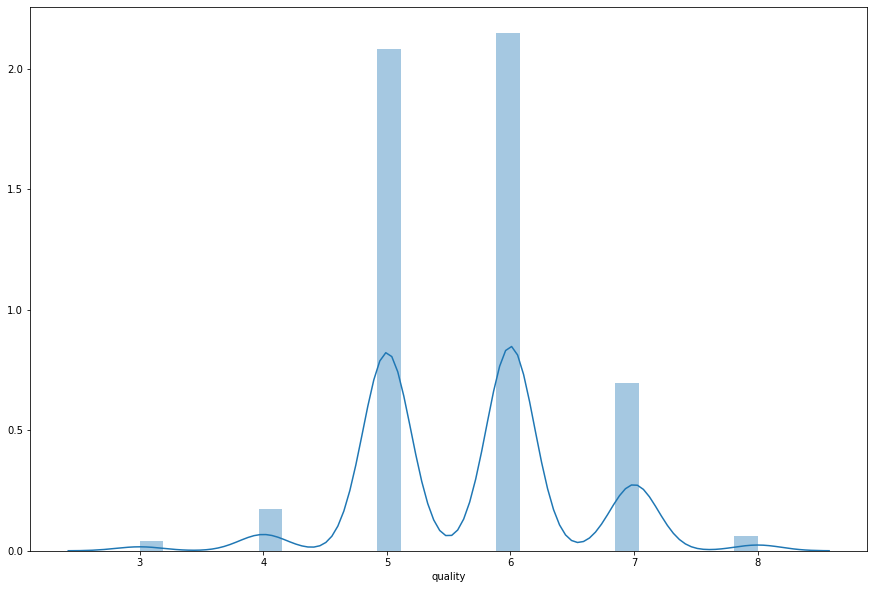

In [10]:
# checking the average value of quality in train dataset
plt.figure(figsize=(15, 10))
plt.tight_layout()
sea.distplot(Y_train)

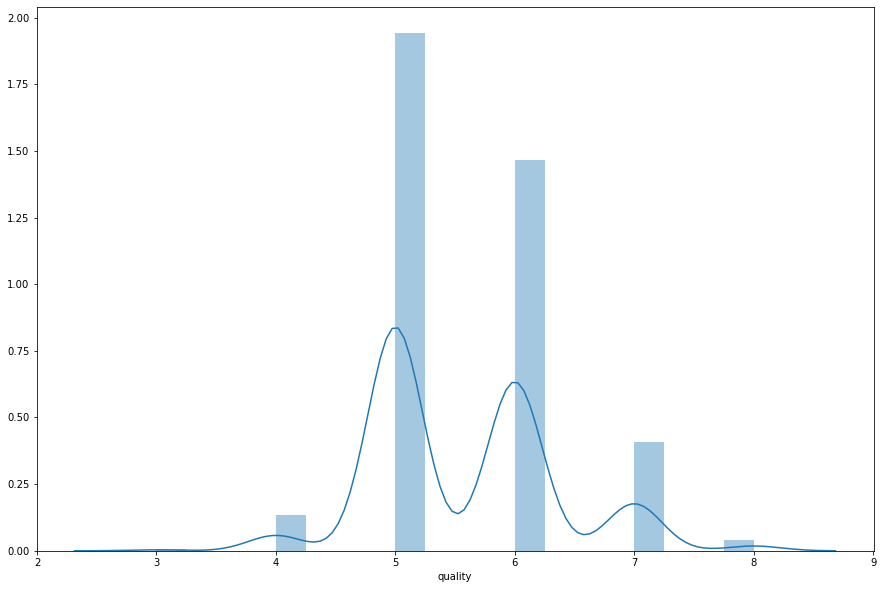

In [11]:
# checking the average value of quality in test dataset
plt.figure(figsize=(15, 10))
plt.tight_layout()
sea.distplot(Y_test)

In [12]:
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
coeff=pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])
coeff

,Coefficient
fixed acidity,-0.005731
volatile acidity,-1.071489
citric acid,-0.063048
residual sugar,0.010234
chlorides,-1.940448
free sulfur dioxide,0.003516
total sulfur dioxide,-0.002155
density,-26.891259
pH,-0.634244
sulphates,1.241948


In [14]:
Y_pred=regressor.predict(X_test)
predictedDf=pd.DataFrame({'Actual value': Y_test, 'Predicted value': Y_pred})
predictedDf

,Actual value,Predicted value
0,5,4.940841
1,5,5.167903
2,5,5.214698
3,6,5.649335
4,5,4.940841
5,5,4.978719
6,5,5.058687
7,7,5.262287
8,7,5.261383
9,5,5.753183


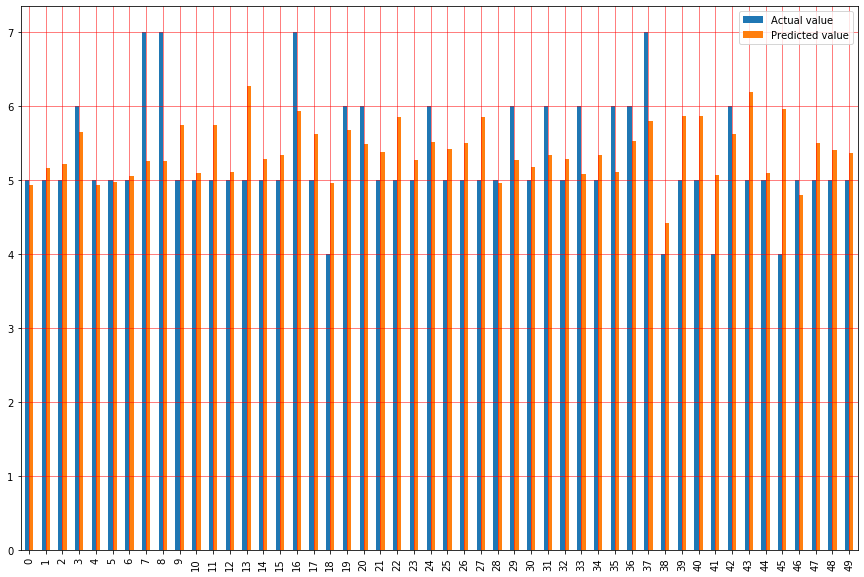

In [15]:
sampleDf=predictedDf.head(50)
sampleDf.plot(kind='bar', figsize=(15, 10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='blue')
plt.show()

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sum_squared_error=np.sum(np.square(np.subtract(Y_test, Y_pred)))
print('Sum of Squared Error:', sum_squared_error) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Sum of Squared Error: 214.22502400534057
Mean Absolute Error: 0.5224781243375761
Mean Squared Error: 0.4463021333444595
Root Mean Squared Error: 0.6680584804824047


In [17]:
cf_matrix=confusion_matrix(Y_test, Y_pred.round())
cf_matrix

array([[  0,   0,   1,   0,   0,   0],
       [  0,   1,  10,   5,   0,   0],
       [  0,   1, 171,  60,   1,   0],
       [  0,   0,  73,  93,  10,   0],
       [  0,   0,   5,  41,   3,   0],
       [  0,   0,   0,   3,   2,   0]])

Text(0.5, 1, 'Confusion Matrix')

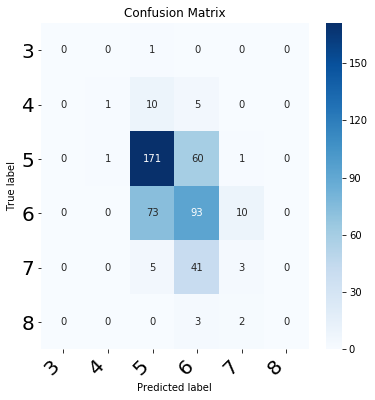

In [50]:
df_cm = pd.DataFrame(cf_matrix, index=[3, 4, 5, 6, 7, 8], columns=[3, 4, 5, 6, 7, 8] )
plt.figure(figsize=(6, 6))  
heatmap = sea.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

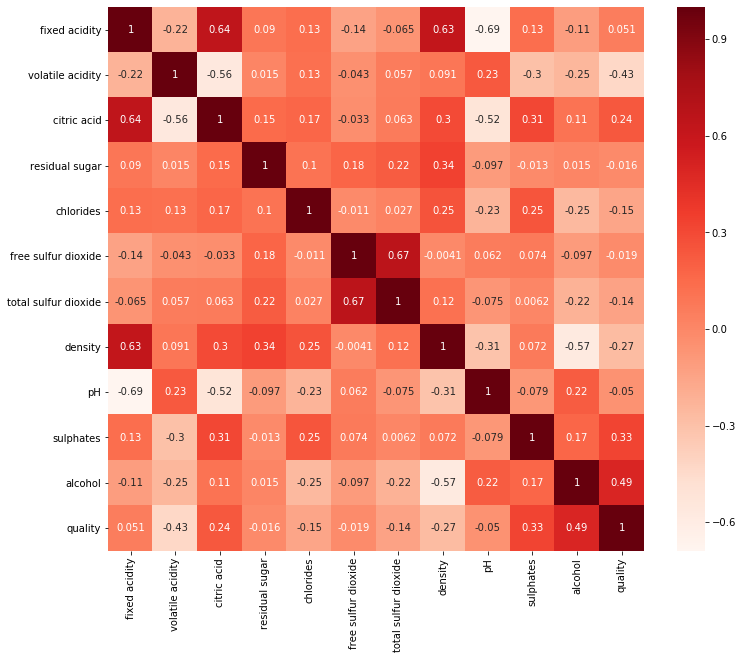

In [19]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = dataTrain.corr()
sea.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
#Correlation with output variable
corr_target = abs(corr['quality'])
#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.4]
relevant_features

volatile acidity    0.426341
alcohol             0.492111
quality             1.000000
Name: quality, dtype: float64

In [21]:
#any correlation between selected variables?
print(dataTrain[['volatile acidity', 'alcohol']].corr())

                  volatile acidity  alcohol
volatile acidity           1.00000 -0.24571
alcohol                   -0.24571  1.00000


In [22]:
X_train_2var=dataTrain[[ 'volatile acidity', 'alcohol']]
Y_train_2var=dataTrain['quality']
X_test_2var=dataTest[['volatile acidity', 'alcohol']]
Y_test_2var=dataTest['quality']

In [23]:
regressor.fit(X_train_2var, Y_train_2var)
coeff_2var=pd.DataFrame(regressor.coef_, X_train_2var.columns, columns=['Coefficient'])
coeff_2var

,Coefficient
volatile acidity,-1.482604
alcohol,0.315569


In [24]:
Y_pred_2var=regressor.predict(X_test_2var)
predictedDf_2var=pd.DataFrame({'Actual value': Y_test_2var, 'Predicted value': Y_pred_2var})
predictedDf_2var

,Actual value,Predicted value
0,5,5.037770
1,5,4.897129
2,5,5.075042
3,6,5.786692
4,5,5.037770
5,5,5.097075
6,5,5.186031
7,7,5.301242
8,7,5.247240
9,5,5.681417


In [25]:
sum_squared_error_2var=np.sum(np.square(np.subtract(Y_test_2var, Y_pred_2var)))
print('Sum of Squared Error:', sum_squared_error_2var) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_2var, Y_pred_2var))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_2var, Y_pred_2var))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_2var, Y_pred_2var)))

Sum of Squared Error: 215.9893912293054
Mean Absolute Error: 0.5259480135147865
Mean Squared Error: 0.44997789839438623
Root Mean Squared Error: 0.6708039194834704


In [26]:
cf_matrix_2var=confusion_matrix(Y_test_2var, Y_pred_2var.round())
cf_matrix_2var

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  15,   1,   0,   0],
       [  0,   1, 177,  55,   0,   0],
       [  0,   2,  71,  96,   7,   0],
       [  0,   0,   5,  43,   1,   0],
       [  0,   0,   0,   3,   2,   0]])

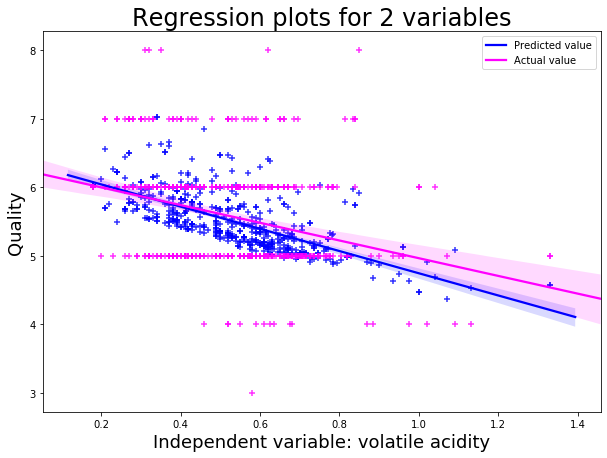

In [27]:
fig = plt.figure(figsize=(10, 7))
sea.regplot(x=X_test_2var['volatile acidity'], y=Y_pred_2var, color='blue', marker='+')
sea.regplot(x=X_test_2var['volatile acidity'], y=Y_test_2var, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Predicted value', 'Actual value'])
plt.title('Regression plots for 2 variables', size=24)
plt.xlabel('Independent variable: volatile acidity', size=18)
plt.ylabel('Quality', size=18);

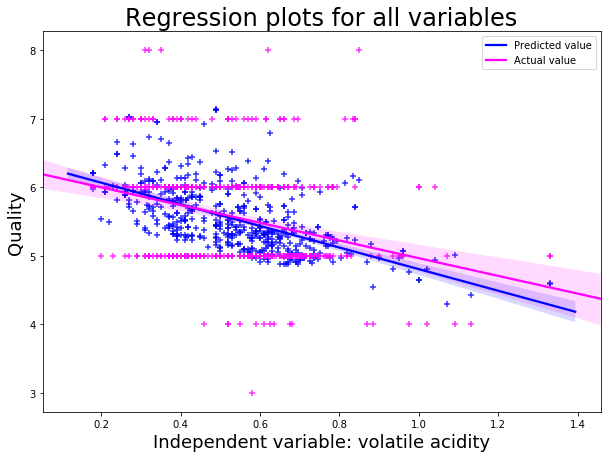

In [28]:
fig = plt.figure(figsize=(10, 7))
sea.regplot(x=X_test['volatile acidity'], y=Y_pred, color='blue', marker='+')
sea.regplot(x=X_test['volatile acidity'], y=Y_test, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Predicted value', 'Actual value'])
plt.title('Regression plots for all variables', size=24)
plt.xlabel('Independent variable: volatile acidity', size=18)
plt.ylabel('Quality', size=18);

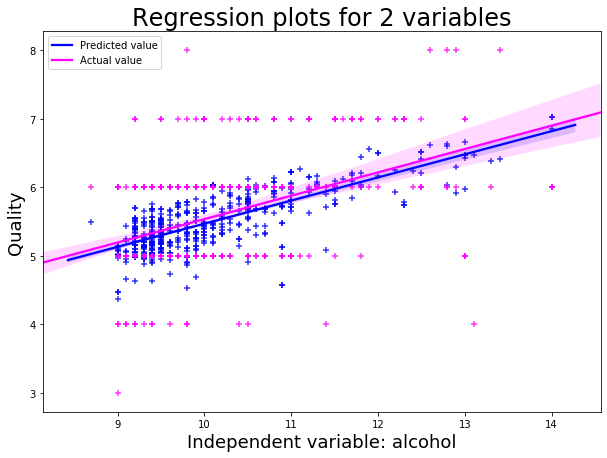

In [29]:
fig = plt.figure(figsize=(10, 7))
sea.regplot(x=X_test_2var['alcohol'], y=Y_pred_2var, color='blue', marker='+')
sea.regplot(x=X_test_2var['alcohol'], y=Y_test_2var, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Predicted value', 'Actual value'])
plt.title('Regression plots for 2 variables', size=24)
plt.xlabel('Independent variable: alcohol', size=18)
plt.ylabel('Quality', size=18);

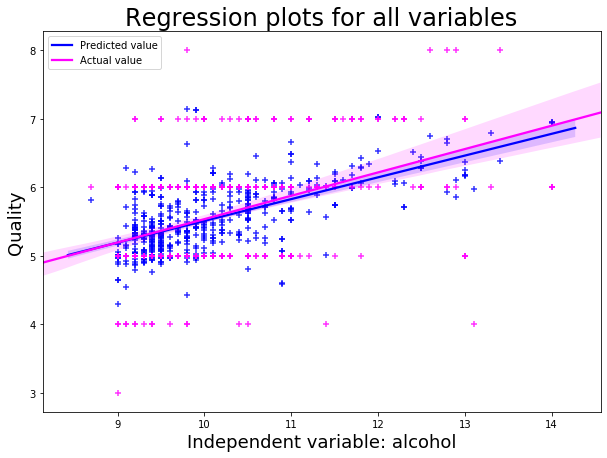

In [30]:
fig = plt.figure(figsize=(10, 7))
sea.regplot(x=X_test['alcohol'], y=Y_pred, color='blue', marker='+')
sea.regplot(x=X_test['alcohol'], y=Y_test, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Predicted value', 'Actual value'])
plt.title('Regression plots for all variables', size=24)
plt.xlabel('Independent variable: alcohol', size=18)
plt.ylabel('Quality', size=18);

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca = pd.DataFrame(pca.transform(X_train_scaled), columns=['Principal Component 1', 'Principal Component 2'])

finalDf = X_train_pca.join(Y_train)

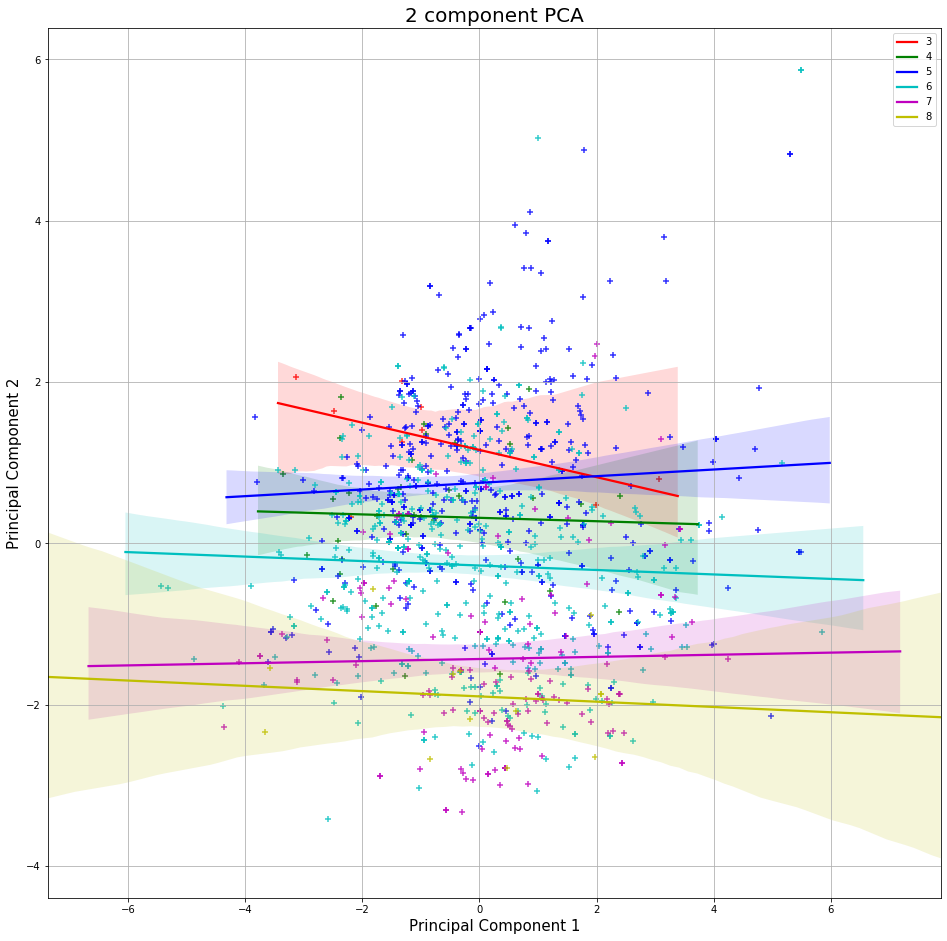

In [32]:
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [3, 4, 5, 6, 7, 8]
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for target, colour in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    df=pd.DataFrame(finalDf.loc[indicesToKeep])
    sea.regplot(x=df['Principal Component 1'], y=df['Principal Component 2'], color=colour, marker='+')
#g = sea.FacetGrid(finalDf, col='quality', margin_titles=True)
#g.map(sea.regplot, 'Principal Component 1', 'Principal Component 2', color=".3")#, fit_reg=False, x_jitter=.1)
ax.legend(targets)
ax.grid()

In [33]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Backward Elimination
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    pval= []
    X_train_BE = X_train[cols]
    #Adding constant column of ones, mandatory for sm.OLS model
    X_train_BE = sm.add_constant(X_train_BE)
    #Fitting sm.OLS model
    model = sm.OLS(Y_train, X_train_BE).fit()
    pval = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(pval)
    feature_with_p_max = pval.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(X_train_BE)
print(selected_features_BE)

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/from

      const  volatile acidity  chlorides  total sulfur dioxide  density    pH  \
0       1.0             0.280      0.069                  23.0  1.00260  3.12   
1       1.0             0.300      0.080                  17.0  0.99640  3.15   
2       1.0             0.360      0.152                  18.0  0.99860  3.04   
3       1.0             0.360      0.152                  18.0  0.99860  3.04   
4       1.0             0.440      0.114                  24.0  0.99700  3.06   
5       1.0             0.670      0.054                  17.0  0.99760  3.17   
6       1.0             0.670      0.054                  17.0  0.99760  3.17   
7       1.0             0.645      0.053                  14.0  0.99820  3.17   
8       1.0             0.320      0.081                  67.0  1.00020  3.32   
9       1.0             0.390      0.073                  26.0  0.99840  3.34   
10      1.0             0.775      0.078                  56.0  0.99840  3.31   
11      1.0             0.41

In [34]:
X_train_BE=X_train_BE.drop('const', axis=1)
X_test_BE=X_test[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [35]:
regressor.fit(X_train_BE, Y_train)
coeff_BE=pd.DataFrame(regressor.coef_, X_train_BE.columns, columns=['Coefficient'])
coeff_BE

,Coefficient
volatile acidity,-1.060746
chlorides,-1.918565
total sulfur dioxide,-0.001243
density,-29.868382
pH,-0.541743
sulphates,1.241958
alcohol,0.265098


In [36]:
Y_pred_BE=regressor.predict(X_test_BE)
predictedDf_BE=pd.DataFrame({'Actual value': Y_test, 'Predicted value': Y_pred_BE})
predictedDf_BE

,Actual value,Predicted value
0,5,4.954184
1,5,5.132920
2,5,5.212137
3,6,5.683825
4,5,4.954184
5,5,4.991077
6,5,5.074011
7,7,5.252349
8,7,5.257169
9,5,5.767790


In [37]:
sum_squared_error_BE=np.sum(np.square(np.subtract(Y_test, Y_pred_BE)))
print('Sum of Squared Error:', sum_squared_error_BE) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_BE))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_BE))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_BE)))

Sum of Squared Error: 215.9400465298529
Mean Absolute Error: 0.5274607080136313
Mean Squared Error: 0.4498750969371936
Root Mean Squared Error: 0.670727289542623


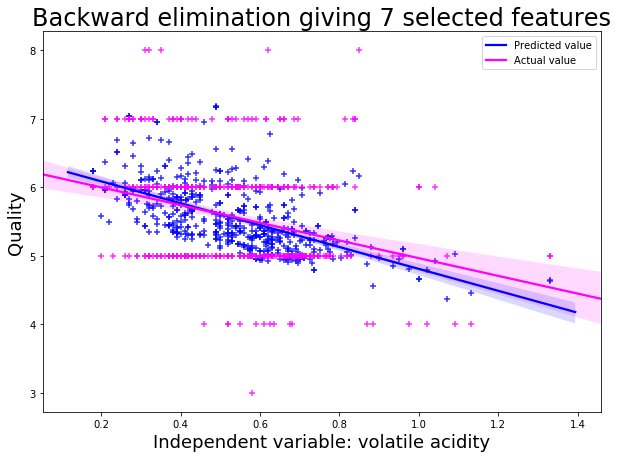

In [38]:
fig = plt.figure(figsize=(10, 7))
sea.regplot(x=X_test_BE['volatile acidity'], y=Y_pred_BE, color='blue', marker='+')
sea.regplot(x=X_test_BE['volatile acidity'], y=Y_test, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Predicted value', 'Actual value'])
plt.title('Backward elimination giving 7 selected features', size=24)
plt.xlabel('Independent variable: volatile acidity', size=18)
plt.ylabel('Quality', size=18);

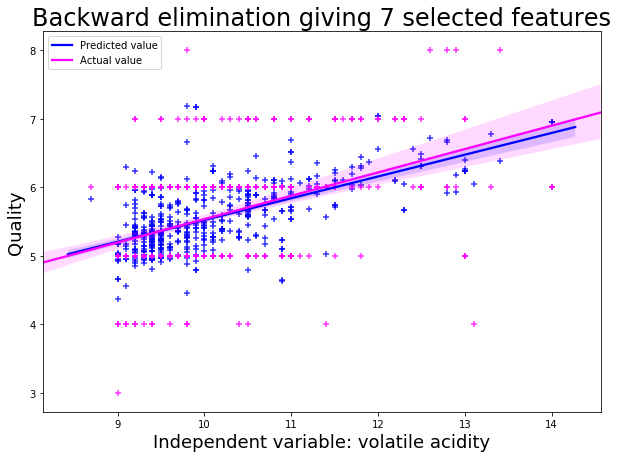

In [39]:
fig = plt.figure(figsize=(10, 7))
sea.regplot(x=X_test_BE['alcohol'], y=Y_pred_BE, color='blue', marker='+')
sea.regplot(x=X_test_BE['alcohol'], y=Y_test, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Predicted value', 'Actual value'])
plt.title('Backward elimination giving 7 selected features', size=24)
plt.xlabel('Independent variable: volatile acidity', size=18)
plt.ylabel('Quality', size=18);

In [40]:
#Recursive Feature Elimination
#no of features
nof_list=np.arange(1,11)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    #X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model, nof_list[n])
    X_train_RFE = rfe.fit_transform(X_train, Y_train)
    X_test_RFE = rfe.transform(X_test)
    model.fit(X_train_RFE, Y_train)
    score = model.score(X_test_RFE, Y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.224163


In [41]:
cols = list(X_train.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_train_RFE = rfe.fit_transform(X_train, Y_train)  
#Fitting the data to model
model.fit(X_train_RFE, Y_train)              
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe) 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')


In [42]:
X_train_RFE=X_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol']]
X_test_RFE=X_test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol']]
regressor.fit(X_train_RFE, Y_train)
coeff_RFE=pd.DataFrame(regressor.coef_, X_train_RFE.columns, columns=['Coefficient'])
coeff_RFE

,Coefficient
fixed acidity,0.010625
volatile acidity,-1.145584
citric acid,-0.174403
residual sugar,0.009172
chlorides,-1.764433
free sulfur dioxide,-0.000613
density,-33.613738
pH,-0.530661
sulphates,1.252710
alcohol,0.270938


In [43]:
Y_pred_RFE=regressor.predict(X_test_RFE)
predictedDf_RFE=pd.DataFrame({'Actual value': Y_test, 'Predicted value': Y_pred_RFE})
predictedDf_RFE

,Actual value,Predicted value
0,5,4.949272
1,5,5.163162
2,5,5.231474
3,6,5.683653
4,5,4.949272
5,5,4.994718
6,5,5.099055
7,7,5.237089
8,7,5.247774
9,5,5.843922


In [44]:
sum_squared_error_RFE=np.sum(np.square(np.subtract(Y_test, Y_pred_RFE)))
print('Sum of Squared Error:', sum_squared_error_RFE) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_RFE))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_RFE))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_RFE)))

Sum of Squared Error: 220.33608445653624
Mean Absolute Error: 0.5356656695772618
Mean Squared Error: 0.4590335092844505
Root Mean Squared Error: 0.6775201172544255


In [45]:
#Embedded method using Lasso regularization
LassoRegressor = LassoCV()
LassoRegressor.fit(X_train, Y_train)
print("Best alpha using built-in LassoCV: %f" % LassoRegressor.alpha_)
print("Best score using built-in LassoCV: %f" %LassoRegressor.score(X_train, Y_train))
coeff_Lasso = pd.Series(LassoRegressor.coef_, index = X_train.columns)
print(coeff_Lasso)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.003679
Best score using built-in LassoCV: 0.375475
fixed acidity          -0.004983
volatile acidity       -1.095259
citric acid            -0.000000
residual sugar         -0.005872
chlorides              -0.000000
free sulfur dioxide     0.004189
total sulfur dioxide   -0.001985
density                -0.000000
pH                     -0.317868
sulphates               0.838063
alcohol                 0.309439
dtype: float64


Lasso picked 8 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

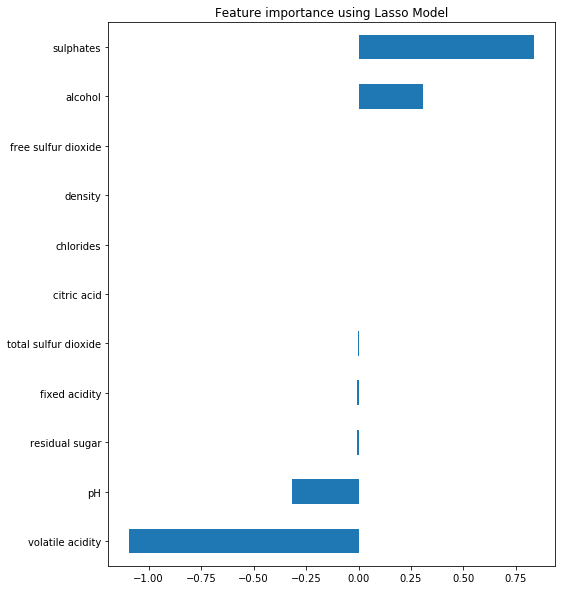

In [46]:
print("Lasso picked " + str(sum(coeff_Lasso != 0)) + " variables and eliminated the other " +  str(sum(coeff_Lasso == 0)) + " variables")
imp_coef = coeff_Lasso.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [47]:
X_train_Lasso=X_train[['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'total sulfur dioxide', 'free sulfur dioxide', 'sulphates', 'alcohol']]
X_test_Lasso=X_test[['fixed acidity', 'volatile acidity', 'residual sugar', 'pH', 'total sulfur dioxide', 'free sulfur dioxide', 'sulphates', 'alcohol']]
regressor.fit(X_train_Lasso, Y_train)
coeff_Lasso=pd.DataFrame(regressor.coef_, X_train_Lasso.columns, columns=['Coefficient'])
coeff_Lasso

,Coefficient
fixed acidity,-0.030213
volatile acidity,-1.154515
residual sugar,-0.007163
pH,-0.638461
total sulfur dioxide,-0.002129
free sulfur dioxide,0.004101
sulphates,1.003743
alcohol,0.310958


In [48]:
Y_pred_Lasso=regressor.predict(X_test_Lasso)
predictedDf_Lasso=pd.DataFrame({'Actual value': Y_test, 'Predicted value': Y_pred_Lasso})
predictedDf_Lasso

,Actual value,Predicted value
0,5,4.924361
1,5,5.129375
2,5,5.188307
3,6,5.631630
4,5,4.924361
5,5,4.966689
6,5,5.023746
7,7,5.207052
8,7,5.212860
9,5,5.687123


In [49]:
sum_squared_error_Lasso=np.sum(np.square(np.subtract(Y_test, Y_pred_Lasso)))
print('Sum of Squared Error:', sum_squared_error_Lasso) 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_Lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_Lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_Lasso)))

Sum of Squared Error: 221.8252175508312
Mean Absolute Error: 0.527214800572955
Mean Squared Error: 0.462135869897565
Root Mean Squared Error: 0.6798057589470429
